This notebook was made using the ideas presented in https://github.com/royalosyin/Python-Practical-Application-on-Climate-Variability-Studies/blob/master/ex18-EOF%20analysis%20global%20SST.ipynb

Other examples for testing: https://notebook.community/royalosyin/Python-Practical-Application-on-Climate-Variability-Studies/ex17-EOF%20analysis%20global%20hgt500

**Eofs** library documentation can be found here: https://ajdawson.github.io/eofs/latest/

In [1]:
import numpy as np
from scipy import signal
import numpy.polynomial.polynomial as poly
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from eofs.standard import Eof

In [2]:
# Read SST data

infile = '../data\sst.mnmean.nc'
ncin = Dataset(infile)

In [3]:
ncin

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    climatology: Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.
    description: In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    keywords: Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >
    instrument: Conventional thermometers
    source_comment: SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker
    geospatial_lon_min: -1.0
    geospatial_lon_max: 359.0
    geospatial_laty_max: 89.0
    geospatial_laty_min: -89.0
    geospatial_lat_max: 89.0
    geospatial_lat_min: -89.0
    

In [4]:
ncin['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: days since 1800-1-1 00:00:00
    long_name: Time
    delta_t: 0000-01-00 00:00:00
    avg_period: 0000-01-00 00:00:00
    prev_avg_period: 0000-00-07 00:00:00
    standard_name: time
    axis: T
    actual_range: [19723. 81722.]
unlimited dimensions: time
current shape = (2038,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [27]:
# sst  = ncin.variables['sst'][1000:,:,:]
sst  = ncin.variables['sst'][:]
lat  = ncin.variables['lat'][:]
lon  = ncin.variables['lon'][:]

nt,nlat,nlon = sst.shape    
print(sst.shape)

(2038, 89, 180)


In [28]:
# sst = sst.reshape((nt,nlat*nlon), order='F')
# sst_detrend = signal.detrend(sst, axis=0, type='linear', bp=0)
# sst_detrend = sst_detrend.reshape((12,nt/12, nlat,nlon), order='F').transpose((1,0,2,3))

# print(sst_detrend.shape)

In [29]:
wgts   = np.cos(np.deg2rad(lat))
wgts   = wgts.reshape(len(wgts), 1)
solver = Eof(sst, weights=wgts)

C:\Users\mathe\AppData\Local\Temp\ipykernel_17092\414875782.py:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  solver = Eof(sst, weights=wgts)


In [30]:
eof1 = solver.eofs(neofs=10)
pc1  = solver.pcs(npcs=10, pcscaling=0)
varfrac = solver.varianceFraction()
lambdas = solver.eigenvalues()

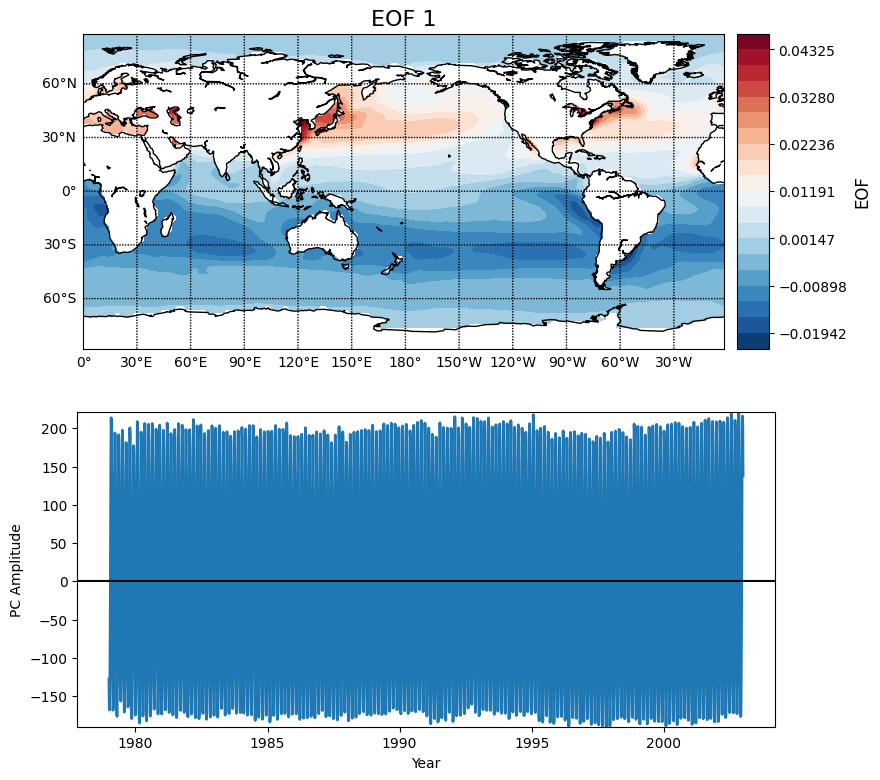

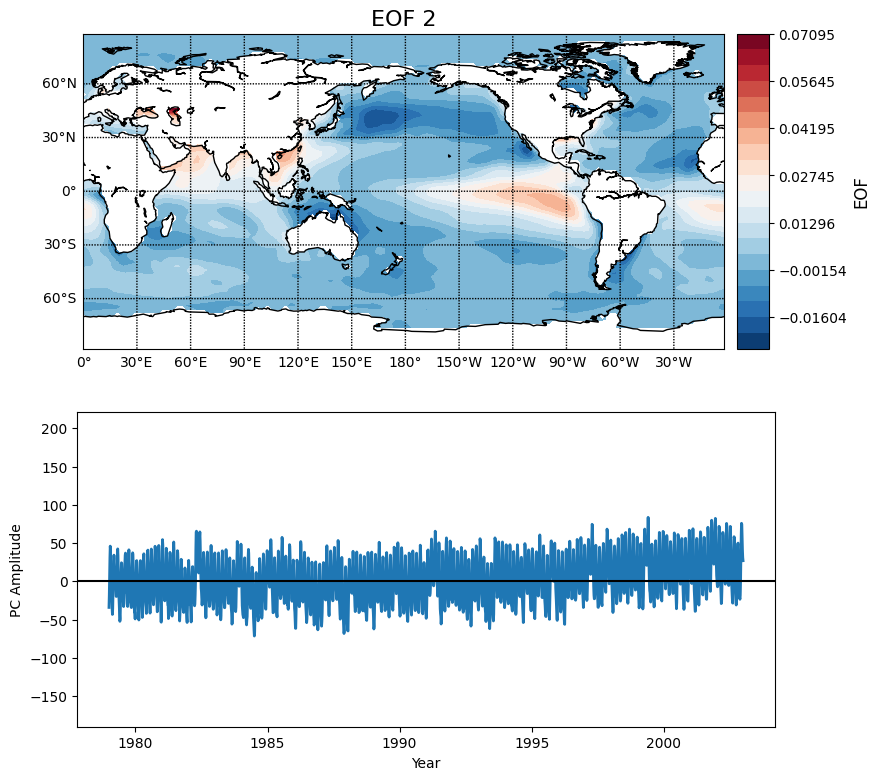

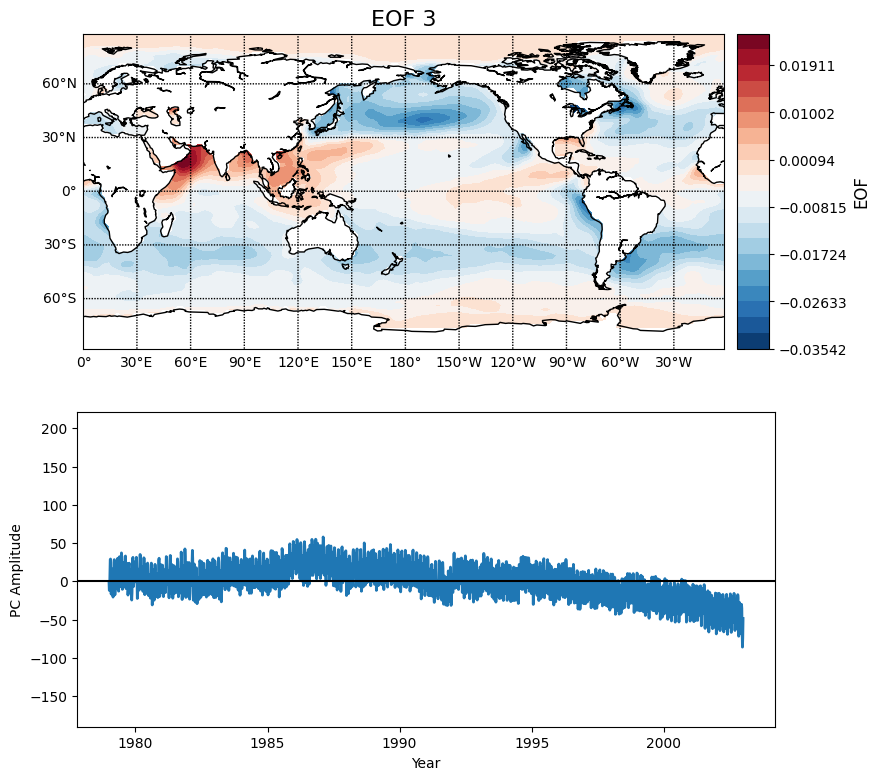

In [31]:
parallels = np.arange(-90,90,30.)
meridians = np.arange(-180,180,30)

for i in range(0,3):
    fig = plt.figure(figsize=(9,9))
    plt.subplot(211)
    
    m = Basemap(projection='cyl', llcrnrlon=min(lon), llcrnrlat=min(lat), urcrnrlon=max(lon), urcrnrlat=max(lat))    
    x, y = m(*np.meshgrid(lon, lat))
    clevs = np.linspace(np.min(eof1[i,:,:].squeeze()), np.max(eof1[i,:,:].squeeze()), 21)
    cs = m.contourf(x, y, eof1[i,:,:].squeeze(), clevs, cmap=plt.cm.RdBu_r)
    m.drawcoastlines()  
    m.drawparallels(parallels, labels=[1,0,0,0])
    m.drawmeridians(meridians, labels=[1,0,0,1])

    cb = m.colorbar(cs, 'right', size='5%', pad='2%')
    cb.set_label('EOF', fontsize=12)
    plt.title('EOF ' + str(i+1), fontsize=16)

    plt.subplot(212)
    days = np.linspace(1979,2003,nt)
    plt.plot(days, pc1[:,i], linewidth=2)
    plt.axhline(0, color='k')
    plt.xlabel('Year')
    plt.ylabel('PC Amplitude')   
    plt.ylim(np.min(pc1.squeeze()), np.max(pc1.squeeze()))